# Random Walk

A random walk, in the context of [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion), refers to the erratic, unpredictable movement of particles suspended in a fluid, as they constantly collide with the much smaller molecules of the fluid in a manner that appears random and directionless. This concept, first observed by botanist Robert Brown in pollen grains floating in water.

The goal of this exercise is to write a Python script that simulates the random movement of a particle (e.g. a soil colloid in an aqueous suspension).

In [48]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt


## Solution using a `for` loop

In [52]:
# Set random seed for reproducible results
np.random.seed(1)

# Initialize list with particle position
x = [0]
y = [0]

# Define number of particle steps
N = 1000

# Iterate and track the particle over each step
for t in range(1,N):
    
    # Generate random step (+1, 0, or -1)
    x_step = np.random.randint(-1,2)
    y_step = np.random.randint(-1,2)

    # Update position
    x_new = x[t-1] + x_step
    y_new = y[t-1] + y_step
    
    # Append new position
    x.append(x_new)
    y.append(y_new)

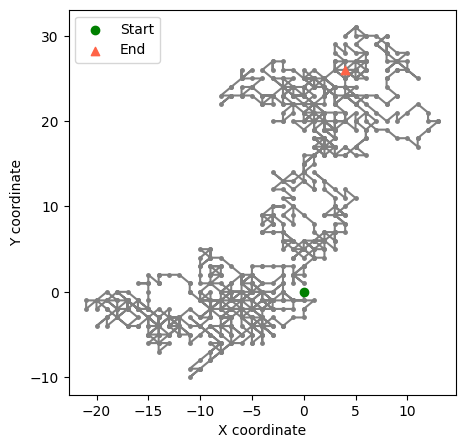

In [53]:
# Plot random walk
plt.figure(figsize=(5,5))
plt.plot(x, y, markersize=5, linestyle='-', marker='.', color='grey',zorder=0)
plt.scatter(x[0], y[0], marker='o', facecolor='green', label='Start',zorder=1)
plt.scatter(x[-1], y[-1], marker='^', facecolor='tomato', label='End', zorder=2)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.show()


## Solution without using a `for` loop

In [54]:
# Set random seed for reproducibility
np.random.seed(1)

# Number of particle steps
N = 1000

x = np.array([0])
y = np.array([0])

# Generate set of random steps
x_steps = np.random.randint(-1,2,N)
y_steps = np.random.randint(-1,2,N)

# Cumulative sum (cumulative effect) of random choices
x = np.concatenate((x, x_steps)).cumsum()
y = np.concatenate((y, y_steps)).cumsum()


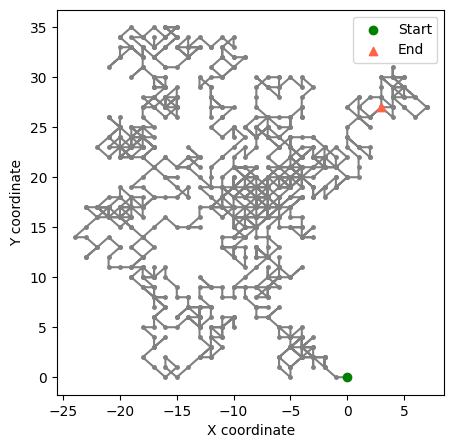

In [55]:
# Plot random walk
plt.figure(figsize=(5,5))
plt.plot(x, y, markersize=5, linestyle='-', marker='.', color='grey',zorder=0)
plt.scatter(x[0], y[0], marker='o', facecolor='green', label='Start',zorder=1)
plt.scatter(x[-1], y[-1], marker='^', facecolor='tomato', label='End', zorder=2)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.show()


## Why are the two solutions different?

Setting the random seed using `np.random.seed(1)` ensures that you get the same sequence of random numbers every time you run your code from the start, **given that the sequence of random number generation calls is the same**. 

The key point is that the random number generator's state progresses with each call, so the sequence of numbers you get depends on the number of times you've called the generator. The initial seed only sets the starting point of the sequence, but each call to generate a random number advances the state, leading to different subsequent numbers. That's why the series of numbers generated in the loop and the array generated after the loop are different, despite both sequences being deterministic and reproducible when starting from the same seed.

Here is some code to visualize the difference in the generated steps:

In [58]:
np.random.seed(1)
N = 10
loop_nums = []
for n in range(N):
    loop_nums.append(np.random.randint(-1,2))

print(loop_nums)
print(np.random.randint(-1,2,N))

[0, -1, -1, 0, 0, -1, -1, 0, -1, 0]
[-1  1  0  1 -1  1  0  1 -1 -1]
